<a href="https://colab.research.google.com/github/thegrouch4413/Predictive-Analysis/blob/main/Basic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Analysis
Regression analysis refers to the use of statistical methods to estimate the relationships between one or more independent variables and dependent variables.

Regression is a powerful tool as it is used to assess the strength of the relationship between two or more variables, and then it would be used for modeling the relationship between those variables in the future.

source

#Building a basic regression model.

We know that a Linear regression is a way to model the relationship between two variables. We will use the equation as the slope formula. The equation has the form:

Y=α+βX 
where Y is the dependent variable (that’s the variable on the vertical or Y axis).

X is the independent variable (i.e. it is plotted on the Horizontal or X axis).

b is the slope of the line and a is the y-intercept.

# Import the Libraries

In [25]:
import pandas as pd  #https://pythonistaplanet.com/pandas/#:~:text=Pandas%20is%20a%20Python%20library%20that%20is%20used,sure%20you%20have%20numpy%20installed%20in%20your%20system.#
import numpy as np   #https://numpy.org/doc/stable/user/whatisnumpy.html#
import math 
import statsmodels.formula.api as smf #https://www.statsmodels.org/stable/api.html#
from sklearn.linear_model import LinearRegression #https://datagy.io/python-sklearn-linear-regression/#
from matplotlib import pyplot as plt #https://www.activestate.com/resources/quick-reads/what-is-matplotlib-in-python-how-to-use-it-for-plotting/#
import seaborn as sns #https://seaborn.pydata.org/#:~:text=Seaborn%20is%20a%20Python%20data%20visualization%20library%20based,can%20read%20the%20introductory%20notes%20or%20the%20paper.
sns.set()

## To construct our analysis, first, lets generate some 'random' data

In [2]:
np.random.seed(10)
X = 2.5 * np.random.randn(1000) + 1.5   # Array of 100 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(1000)       # Generate 100 residual terms
y = 2 + 0.3 * X + res                   # Actual values of Y

#Now, let's creat a pandas dataframe to store our x and y **values**

In [3]:
df = pd.DataFrame({'X': X,'y': y})

In [4]:
df.head()

,X,y
0,4.828966,4.205316
1,3.288197,2.915292
2,-2.363501,1.221240
3,1.479040,3.031466
4,3.053340,3.507896


## Next, we want to calculate the mean of X and the mean y
*The mean of an array refers to the sum of array elements divided by the number of elements.*

In [5]:
xmean = np.mean(X)
ymean = np.mean(y)

In [6]:
xmean

1.4636084109613239

In [7]:
ymean

2.4335367575626234

## Now, we need to calculate the terms needed for the numator and denominator of beta to satisfy the line equation formula.

In [8]:
df['xycov'] = (df['X'] - xmean) * (df['y'] - ymean)
df['xvar'] = (df['X'] - xmean)**2

### We can now calculate $\beta$ and $\alpha$.

*This is the formula for each...*

<font size="6"><center>$\alpha = \frac{\sum(y)\sum(x^2) - \sum(x)\sum(xy)}{n\sum(x^2) - (\sum(x))^2}$</center>
<br>
<center>$\beta = \frac{n\sum(xy) - \sum(x)\sum(y)}{n\sum(x^2) - (\sum(x))^2}$</center></font>

In [9]:
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = 1.9734233360735431
beta = 0.31436921108349586


###Great, we now have an estimate for alpha and beta!

<font size = 6><center>$y_{pred} = \alpha + \beta * X$</center></font></span>

In [10]:
ypred = alpha + (beta*X)

# Plotting our data and line
### Let’s plot our prediction ypred against the actual values of y, 
### to get a better visual understanding of our model.

# Plot regression against actual data

Text(0, 0.5, 'y')

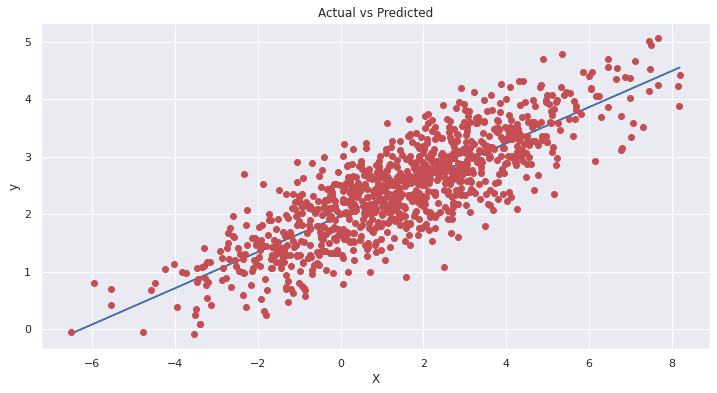

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(X, ypred)     # regression line
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

# PART II

# Linear Regression

Linear regression is a classic method of fitting a line to a set of data. It can be extended to fitting any curve with linear coefficients.

## Basic Algebra

A line can be defined using this standard equation:

$$y = a x + b$$

Where $a$ is the slope and $b$ is the y-intercept. Given two sets of points $x_1, y_1$ and $x_2, y_2$, we have two equations with two unknowns. It is then possible to solve for $a$ and $b$ explicitly.

For example, given the points 2, 1 and 3, 3, we can visualize these points:

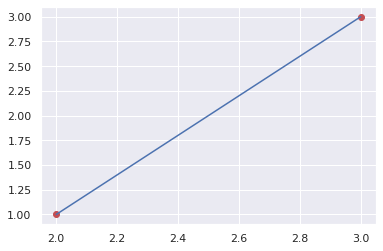

In [12]:
(x1, y1) = (2, 1) #TUPLE https://www.tutorialspoint.com/python/python_tuples.htm#
(x2, y2) = (3, 3)

plt.plot(x1, y1, 'ro')
plt.plot(x2, y2, 'ro')
plt.plot([x1, x2], [y1, y2])
plt.show()

To solve for constants $a$ and $b$, we can write these two equations:

$$1 = 2 a + b$$

$$3 = 3 a + b$$

Using basic algebra, we find the values for $a$ and $b$ are:

$$a = 2$$

$$b = -3$$

Redrawing the graph with the y-intercept:

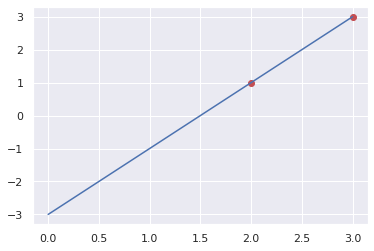

In [13]:
a = 2
b = -3

plt.plot(x1, y1, 'ro')
plt.plot(x2, y2, 'ro')
plt.plot([0, x2], [b, y2])
plt.show()

## Linear Algebra

The problem above can be abstracted using [linear algebra](https://en.wikipedia.org/wiki/Linear_algebra). The system of equations above can be rewritten in matrix form:

$$1 = 2 a + b$$

$$3 = 3 a + b$$

$$ \begin{bmatrix}
1 \\
3
\end{bmatrix} = \begin{bmatrix}
2 & 1 \\
3 & 1 \\
\end{bmatrix} \begin{bmatrix}
a \\
b
\end{bmatrix}$$

This can be written more generally as matrix equation

$$y = A v$$

Where $y$ and $v$ are vectors and $A$ is a matrix:

$$y = \begin{bmatrix}
1 \\
3
\end{bmatrix}$$

$$v = \begin{bmatrix}
a \\
b
\end{bmatrix}$$

$$A = \begin{bmatrix}
2 & 1 \\
3 & 1 \\
\end{bmatrix}$$

To solve for $a$ and $b$, which is equivalent to solving for the vector $v$, consider how we would solve a simple equation such as

$$1 = 2 x$$

We could multiply both sides of the equation by the inverse of $2$, which is $2^{-1}$

$$2^{-1} \times 1 = 2^{-1} \times 2 x$$

$2 \times 2^{-1}$ is just $1$, so

$$x = \frac{1}{2}$$

By analogy, multiplying the matrix equation above by the inverse of $A$ or $A^{-1}$ on both sides would look like this

$$y = A v$$

$$A^{-1} y = A^{-1} A v$$

The quantity $A^{-1} A$ becomes the [identity matrix](https://en.wikipedia.org/wiki/Identity_matrix), so the vector $v$ would then be

$$v = A^{-1} y$$

NumPy contains methods to compute the inverse of a matrix.

In [14]:
# Create a 2x2 matrix

A = np.array([[x1, 1], [x2, 1]])
A

array([[2, 1],
       [3, 1]])

In [15]:
# Compute the inverse of A

Ainv = np.linalg.inv(A)
Ainv

array([[-1.,  1.],
       [ 3., -2.]])

In [16]:
# Multiply the inverse of A with A to confirm it produces the identity matrix

Ainv.dot(A)

array([[1.0000000e+00, 0.0000000e+00],
       [4.4408921e-16, 1.0000000e+00]])

This is the value of the identity matrix with a very small round-off error:

$$A^{-1} A = I = \begin{bmatrix}
1 & 0 \\
0 & 1 \\
\end{bmatrix}$$

Multiplying the vector $v$ with $A^{-1}$ on the left yields the vector $y$:

In [17]:
y = np.array([1, 3])
v = Ainv.dot(y)
v

array([ 2., -3.])

Which is the same result as before with basic algebra.

## More Data

Consider the case when more than two data points are available.

This can be rewritten in matrix form:

$$ \begin{bmatrix}
y_1 \\
y_2 \\
... \\
y_n
\end{bmatrix} = \begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
... \\
x_n & 1
\end{bmatrix} \begin{bmatrix}
a \\
b
\end{bmatrix}$$

Introduce variables for simplification:

$$ y = \begin{bmatrix}
y_1 \\
y_2 \\
... \\
y_n
\end{bmatrix}$$

$$ A = \begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
... \\
x_n & 1
\end{bmatrix}$$

$$ v = \begin{bmatrix}
a \\
b
\end{bmatrix}$$

Substitute variables above to produce a simplifed form:

$$ y = A v$$

If $A$ is a square matrix, i.e. $n = 2$, $a$ and $b$ can be determined exactly:

$$ \begin{bmatrix}
a \\
b
\end{bmatrix} = v = A^{-1} y$$

In the case where $n > 2$, $A$ is not square and cannot be inverted. One solution is to compute a pseudo-inverse by multiplying $A$ by it's transpose $A^T$, which will yield a square matrix on the right hand side:

$$ A^T y = A^T A v$$

The matrix $A^T A$ on the right can be eliminated by multiplying by it's inverse $(A^T A)^{-1}$:

$$ (A^T A)^{-1} A^T y = (A^T A)^{-1} (A^T A) v$$

Simplifying yields the result for $a$ and $b$:

$$ v = \begin{bmatrix}
a \\
b
\end{bmatrix} = (A^T A)^{-1} A^T y$$

## Numerical Example

The following is an example with real values.

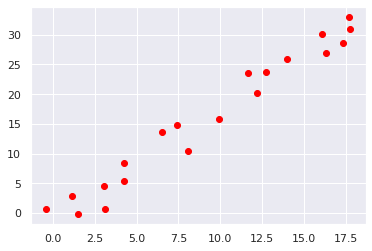

In [18]:
x = np.array([-0.40033681,  1.12710083,  1.51535892,  3.13012734,  3.07744676,
        4.25275393,  6.535855  ,  4.23343874,  8.048823  ,  7.38773014,
        9.91933651, 12.69142755, 11.61959316, 12.20667906, 13.98048109,
       16.07602619, 16.31351797, 17.31102756, 17.74511659, 17.66863483])

y = np.array([ 0.7261771 ,  2.86206199, -0.2489528 ,  0.63325248,  4.49244568,
        5.30531409, 13.6101148 ,  8.48395548, 10.42996366, 14.74172737,
       15.88897483, 23.76571743, 23.61602269, 20.17880228, 25.85779471,
       30.11114371, 26.88735809, 28.57977723, 30.99383456, 33.03676545])

plt.scatter(x, y, color='red')
plt.show()

Prepare matrix A of the form

$$A = \begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
... \\
x_n & 1
\end{bmatrix}$$

In [20]:
x

array([-0.40033681,  1.12710083,  1.51535892,  3.13012734,  3.07744676,
        4.25275393,  6.535855  ,  4.23343874,  8.048823  ,  7.38773014,
        9.91933651, 12.69142755, 11.61959316, 12.20667906, 13.98048109,
       16.07602619, 16.31351797, 17.31102756, 17.74511659, 17.66863483])

In [22]:
ones = np.ones((len(x), 1))
ones

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [21]:
x_matrix = x.reshape((-1, 1))
ones = np.ones((len(x), 1))
A = np.append(x_matrix, ones, axis=1)
A

array([[-0.40033681,  1.        ],
       [ 1.12710083,  1.        ],
       [ 1.51535892,  1.        ],
       [ 3.13012734,  1.        ],
       [ 3.07744676,  1.        ],
       [ 4.25275393,  1.        ],
       [ 6.535855  ,  1.        ],
       [ 4.23343874,  1.        ],
       [ 8.048823  ,  1.        ],
       [ 7.38773014,  1.        ],
       [ 9.91933651,  1.        ],
       [12.69142755,  1.        ],
       [11.61959316,  1.        ],
       [12.20667906,  1.        ],
       [13.98048109,  1.        ],
       [16.07602619,  1.        ],
       [16.31351797,  1.        ],
       [17.31102756,  1.        ],
       [17.74511659,  1.        ],
       [17.66863483,  1.        ]])

Compute the pseudo-inverse

$$(A^T A)^{-1} A^T$$

In [23]:
At = A.T
pseudo_inv = np.linalg.inv(At.dot(A)).dot(At)
pseudo_inv

array([[-0.01354453, -0.01139449, -0.01084797, -0.008575  , -0.00864916,
        -0.00699478, -0.00378106, -0.00702197, -0.00165139, -0.00258195,
         0.00098157,  0.0048836 ,  0.00337487,  0.00420126,  0.00669809,
         0.0096478 ,  0.0099821 ,  0.01138621,  0.01199723,  0.01188958],
       [ 0.17490775,  0.15508006,  0.15004008,  0.12907875,  0.1297626 ,
         0.11450593,  0.08486897,  0.11475666,  0.06522911,  0.07381077,
         0.04094796,  0.00496341,  0.01887691,  0.01125594, -0.0117698 ,
        -0.0389721 , -0.04205498, -0.05500366, -0.06063858, -0.05964577]])

Compute $a$ and $b$ by multiplying the pseudo-inverse times $y$

$$\begin{bmatrix}
a \\
b
\end{bmatrix} = (A^T A)^{-1} A^T y$$

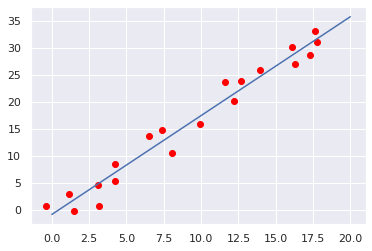

In [24]:
(a, b) = pseudo_inv.dot(y)

x_points = [0, 20]
y_points = [a*x + b for x in x_points]
plt.scatter(x, y, color='red')
plt.plot(x_points, y_points)
plt.show()

## Model Accuracy

The accuracy of the model above can be measured by computing the mean squared error between predicted and training values:

$$ \epsilon = \frac{1}{m} \sum_{i=1}^{m} (a x_i + b - y_i)^2 $$

The prediction error can be computed in the same way, but using the test samples instead of the training samples.

Test error can be different and training error, for example:

- If training error is high, this is a case of __high bias__. This generally means the model is not powerful enough to fit the training data.
- If the training error is low, but the test error is high, this is a case of __high variance__. This usually often means the model is overfitting and does not generalize well with data it has not seen.

In [26]:
epsilon = ((a*x + b - y)**2).mean()
math.sqrt(epsilon)

2.125412002520472

## Extending the Model

In the case where a straight line will not accurately fit the available data, a more complex model can be used. For example, a quadratic model might be more suitable:

$$ y_i = a {x_i}^2 + b x_i + c \tag{10}$$

In matrix form:

$$ \begin{bmatrix}
y_1 \\
y_2 \\
... \\
y_n
\end{bmatrix} = \begin{bmatrix}
{x_1}^2 & x_1 & 1 \\
{x_2}^2 & x_2 & 1 \\
... \\
{x_n}^2 & x_n & 1
\end{bmatrix} \begin{bmatrix}
a \\
b \\
c
\end{bmatrix} \tag{11}$$

In this case the matrix $A$ is:

$$ A = \begin{bmatrix}
{x_1}^2 & x_1 & 1 \\
{x_2}^2 & x_2 & 1 \\
... \\
{x_n}^2 & x_n & 1
\end{bmatrix}\tag{12}$$

The same procedure can be used to find $a$, $b$, and $c$:

$$ \begin{bmatrix}
a \\
b \\
c
\end{bmatrix} = (A^T A)^{-1} A^T y \tag{13}$$